In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

[_Pandas_][1] is the most exahustive library for data analysis in Python, and it can be described as the Pythonic son of SQL and Excel. It is based on [*NumPy*](https://www.numpy.org/) and [*matplotlib*](https://matplotlib.org/), but provides a unified API for many data-related operations, including manipulation, I/O, indexing, alignment, vizualizations, pivoting, grouping, etc.. In addition, it provides an impressive set of tools for working with time-series.

[1]: http://pandas.pydata.org/ "pandas org"

> **Note:** NumPy is the mathematical infrastructure of pandas, and although most of our work will be done with pandas, it is a good idea to get acquainted with numpy basics through the [chapter about numpy](https://drive.google.com/drive/folders/1uQ1E6J3-pLBlmYGZkpSq95XlVal3MA5u?usp=sharing). More specifically, one should be familiar with the concepts of numpy array, advanced indexing and broadcasting.

# The _Series_ class

## Basics

_Series_ objects should be thought of as table columns. Although they are not exactly like _NumPy's_ 1-dimensional arrays, they are very similar, and behave similarly in many cases. _Series_ objects have many attributes and support many methods, which are all documented alphabetically [here][1] and by subject [here][2].

The elements of the series (and the rows of the data-frame, as we'll see later) are **labeled** by an important attribute called **_index_**, which is an instance of the class [_Index_][3] (or one of its subclasses). If _index_ is not specified, then the elements are labeled by the regular row-counter, and the _index_ of the _series_ contains the integers from 0 to _n-1_.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html "Series API documentation A-Z"
[2]: http://pandas.pydata.org/pandas-docs/stable/api.html#series "Series API documentation"
[3]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html "Index API documentation"

In [0]:
dudes_names = pd.Series(['Avi', 'Ben', 'Gad', 'Dor', 'Hen'])
print(dudes_names)

0    Avi
1    Ben
2    Gad
3    Dor
4    Hen
dtype: object


In [0]:
dudes_ages = pd.Series([24, 25, 20, 24, 19])
print(dudes_ages)

0    24
1    25
2    20
3    24
4    19
dtype: int64


We can also specify the index.

In [0]:
dudes_ages = pd.Series([24, 25, 20, 24, 19], 
                       index=['Avi', 'Ben', 'Gad', 'Ben', 'Hen'])
print(dudes_ages)

Avi    24
Ben    25
Gad    20
Ben    24
Hen    19
dtype: int64


> **NOTE:** The index values do **NOT** have to be unique. This is actually a very important concept, which has a lot to do with the speed of pandas. We will see its usage below.

Series support broadcasting much like numpy arrays. Note that the index is kept in the result.

In [0]:
dudes_young = dudes_ages < 21
print(dudes_young)

Avi    False
Ben    False
Gad     True
Ben    False
Hen     True
dtype: bool


In [0]:
dudes_ages = dudes_ages + 1
dudes_ages

Avi    25
Ben    26
Gad    21
Ben    25
Hen    20
dtype: int64

## Indexing and selecting data

Being both array-like and dictionary-like, _Series_ objects intuitively support the standard item-getters of the form `s[label]`, `s.label` and `s[i]`. However, these may be both impractical or ambiguous in some cases, so to provide maximum clarity, *pandas* supports two methods for indexing and selecting data:

* Label-based - implemented by the item-getter `.loc[]`
* integer-position-based - implemented by the item-getter `.iloc[]`


> **Note:** These methods support simple cases, but may be very confusing in more complex scenarios. In such cases it is a good idea to try the thorough documentation for [indexing and selecting data][1]. This is, however, beyond the scope of our course.

[1]: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-and-selecting-data "indexing and selecting data"

In [0]:
names = ['Alon', 'Ari','Barak', 'Itamar','Yarden','Ofer', 'Liran',
         'Oren', 'Ron','Shachar','Shalom','Tal', 'Yosi', 'Tomer',
         'Nir', 'Yaniv', 'Maor', 'Guy', 'Nir', 'Yosi']

cities = ['Beer Sheba', 'Tel Aviv', 'Haifa', 'Rishon LeZion', 'Beersheba', 
          'Herzliya', 'Tal-Aviv', 'Rishon-Lezion', 'Jerusalem', 'Petach-Tikva',
          'Petach Tikva', 'Rishon-LeZion', 'Telaviv', 'Beer-7', 'Tel-Aviv',
          'Jerusalem', 'Haifa', 'Rishon LeZion', 'Beer-Sheba', 'Tel-Aviv']

dudes_cities = pd.Series(data=cities, index=names)
print(dudes_cities)

Alon          Beer Sheba
Ari             Tel Aviv
Barak              Haifa
Itamar     Rishon LeZion
Yarden         Beersheba
Ofer            Herzliya
Liran           Tal-Aviv
Oren       Rishon-Lezion
Ron            Jerusalem
Shachar     Petach-Tikva
Shalom      Petach Tikva
Tal        Rishon-LeZion
Yosi             Telaviv
Tomer             Beer-7
Nir             Tel-Aviv
Yaniv          Jerusalem
Maor               Haifa
Guy        Rishon LeZion
Nir           Beer-Sheba
Yosi            Tel-Aviv
dtype: object


### _loc_ - Label-based indexing

see more at [Selection by Label][1]

[1]: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label

In [0]:
# print(dudes_cities.loc['Liran'])
# print(dudes_cities.loc['Nir'])
print(dudes_cities.loc[['Liran', 'Nir', 'Guy']])

Liran         Tal-Aviv
Nir           Tel-Aviv
Nir         Beer-Sheba
Guy      Rishon LeZion
dtype: object


We specifically note the `loc` option for **Boolean indexing**, which is similar to SQL's `WHERE` statement.

In [0]:
print(dudes_cities.loc[dudes_cities.str.contains('er')])

Alon      Beer Sheba
Yarden     Beersheba
Ofer        Herzliya
Ron        Jerusalem
Tomer         Beer-7
Yaniv      Jerusalem
Nir       Beer-Sheba
dtype: object


### _iloc_ - Integer-location-based

see more at [Selection by Position][1]

[1]: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer

In [0]:
# print(dudes_cities.iloc[1])
print(dudes_cities.iloc[[0, 2]])

Alon     Beer Sheba
Barak         Haifa
dtype: object


## Important attributes

`s.index` returns the index of `s` (instance of the `Index` class).

In [0]:
print(type(dudes_cities.index))
dudes_cities.index

<class 'pandas.core.indexes.base.Index'>


Index(['Alon', 'Ari', 'Barak', 'Itamar', 'Yarden', 'Ofer', 'Liran', 'Oren',
       'Ron', 'Shachar', 'Shalom', 'Tal', 'Yosi', 'Tomer', 'Nir', 'Yaniv',
       'Maor', 'Guy', 'Nir', 'Yosi'],
      dtype='object')

`s.values` returns the values of `s` as an instance of the `array` class.

In [0]:
print(type(dudes_cities.values))
dudes_cities.values

<class 'numpy.ndarray'>


array(['Beer Sheba', 'Tel Aviv', 'Haifa', 'Rishon LeZion', 'Beersheba',
       'Herzliya', 'Tal-Aviv', 'Rishon-Lezion', 'Jerusalem',
       'Petach-Tikva', 'Petach Tikva', 'Rishon-LeZion', 'Telaviv',
       'Beer-7', 'Tel-Aviv', 'Jerusalem', 'Haifa', 'Rishon LeZion',
       'Beer-Sheba', 'Tel-Aviv'], dtype=object)

## Frequent methods

`Series` objects support nearly all the methods of numpy arrays, but also many more, including the following.

### Number of elements

Naturally the built-in `len()` returns the number of elements in the Series. Note that the method `count()` does not count the nulls.

In [0]:
print(len(dudes_cities))
print(dudes_cities.count())

20
20


### head and tail

`head(n)` shows the top `n` records (n=5 by default)

In [0]:
dudes_cities.head(7)

Alon         Beer Sheba
Ari            Tel Aviv
Barak             Haifa
Itamar    Rishon LeZion
Yarden        Beersheba
Ofer           Herzliya
Liran          Tal-Aviv
dtype: object

`tail(n)` shows the bottom *n* records (n=5 by default)

In [0]:
dudes_cities.tail()

Yaniv        Jerusalem
Maor             Haifa
Guy      Rishon LeZion
Nir         Beer-Sheba
Yosi          Tel-Aviv
dtype: object

### `unique()` and `nunique()`

The `unique()` method returns an array of the unique elements of the calling object. The method `nunique()` returns the number of unique values in the series.

In [0]:
unique_count = dudes_cities.nunique()
print(f'there are {unique_count} unique cities out of {len(dudes_cities)} records:\n')
print(dudes_cities.unique())

there are 16 unique cities out of 20 records:

['Beer Sheba' 'Tel Aviv' 'Haifa' 'Rishon LeZion' 'Beersheba' 'Herzliya'
 'Tal-Aviv' 'Rishon-Lezion' 'Jerusalem' 'Petach-Tikva' 'Petach Tikva'
 'Rishon-LeZion' 'Telaviv' 'Beer-7' 'Tel-Aviv' 'Beer-Sheba']


### `value_counts()`

The [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method returns a new series in which the unique elements of the calling object are the index, and the values are their corresponding counts. The returned series is sorted by the counts. 

In [0]:
print(dudes_cities.value_counts())

Haifa            2
Tel-Aviv         2
Rishon LeZion    2
Jerusalem        2
Petach Tikva     1
Herzliya         1
Beersheba        1
Tal-Aviv         1
Petach-Tikva     1
Beer-7           1
Rishon-LeZion    1
Beer Sheba       1
Telaviv          1
Beer-Sheba       1
Rishon-Lezion    1
Tel Aviv         1
dtype: int64


### `replace()`

The [`replace(to_replace, value)`][1] will replace values given in `to_replace` with `value`. We can pass `replace()` a dictionary indicating that dict's keys should be replaced by the dict's values.

[1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html

> **Note:** Like many other functions, `replace()` accepts a boolean argument **`inplace`** indicating whether to perform the operation in place or not. This kwarg affects the return value.

In [0]:
cities_map_dict = {
    'Tel Aviv': 'Tel-Aviv',
    'Rishon LeZion': 'Rishon-LeZion',
    'Petah Tikva': 'Petah-Tikva',
    'Kfar Saba': 'Kfar-Saba',
    'Beersheba': 'Beer-Sheba',
    'Beer Sheba': 'Beer-Sheba',
    'Rishon Lezion': 'Rishon-LeZion',
    "Be'er-Sheva": "Beer-Sheba",
    'Telaviv': 'Tel-Aviv',
    'Beer-7': 'Beer-Sheba',
    'Rishon-Lezion': 'Rishon-LeZion',
    'Petach Tikva': 'Petach-Tikva',
    'Tal-Aviv': 'Tel-Aviv'
}

In [0]:
dudes_cities.replace(cities_map_dict)
# dudes_cities.replace(cities_map_dict).value_counts()
print(dudes_cities, end='\n***\n')

# dudes_cities.replace(cities_map_dict, inplace=True)

print(dudes_cities)


Alon          Beer Sheba
Ari             Tel Aviv
Barak              Haifa
Itamar     Rishon LeZion
Yarden         Beersheba
Ofer            Herzliya
Liran           Tal-Aviv
Oren       Rishon-Lezion
Ron            Jerusalem
Shachar     Petach-Tikva
Shalom      Petach Tikva
Tal        Rishon-LeZion
Yosi             Telaviv
Tomer             Beer-7
Nir             Tel-Aviv
Yaniv          Jerusalem
Maor               Haifa
Guy        Rishon LeZion
Nir           Beer-Sheba
Yosi            Tel-Aviv
dtype: object
***
Alon          Beer Sheba
Ari             Tel Aviv
Barak              Haifa
Itamar     Rishon LeZion
Yarden         Beersheba
Ofer            Herzliya
Liran           Tal-Aviv
Oren       Rishon-Lezion
Ron            Jerusalem
Shachar     Petach-Tikva
Shalom      Petach Tikva
Tal        Rishon-LeZion
Yosi             Telaviv
Tomer             Beer-7
Nir             Tel-Aviv
Yaniv          Jerusalem
Maor               Haifa
Guy        Rishon LeZion
Nir           Beer-Sheba
Yosi   

### _apply(func)_

The [`apply(func)`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) method applies the function `func` on each element of the calling series and returns a new series with the returned values.

In [0]:
dudes_cities.apply(lambda x: x[0]).head()

Alon      B
Ari       T
Barak     H
Itamar    R
Yarden    B
dtype: object

### `sort_values()`

The [`sort_values()`][1] method sorts the elements of the calling object **and keeps their index**. 

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html#pandas.Series.sort_values "Series.sort_values() documentation"

In [0]:
dudes_cities.sort_values(inplace=True)
dudes_cities.head()

Alon      Beer Sheba
Tomer         Beer-7
Nir       Beer-Sheba
Yarden     Beersheba
Maor           Haifa
dtype: object

### The _str_ accessor

When the series dtype is 'str', there is a collection of special methods available to work with strings. They are all collected and accessed through the accessor [_str_][1], and are called only through it. We demonstrate below.

[1]: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling "The str accessor"

In [0]:
print(dudes_cities.str.len().head())

Alon      10
Tomer      6
Nir       10
Yarden     9
Maor       5
dtype: int64


In [0]:
print(dudes_cities.str.endswith('a').head())

Alon       True
Tomer     False
Nir        True
Yarden     True
Maor       True
dtype: bool


In [0]:
print(dudes_cities.str.replace('Sheba', 'Sheva').head())

Alon      Beer Sheva
Tomer         Beer-7
Nir       Beer-Sheva
Yarden     Beersheba
Maor           Haifa
dtype: object


> **Note:** _pandas_ supports several other accessors, including [`plot`][3] for plotting, [`dt`][1] for datetime dtype and [`cat`][2] for categorical data.

[1]: http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties "The dt accessor"
[2]: http://pandas.pydata.org/pandas-docs/stable/api.html#categorical "The cat accessor"
[3]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html "The plot accessor"

> **Your turn:** Import the data from the file *english words.txt* (use the command `pd.read_csv('english words.txt', squeeze=True)`) and follow the next questions and tasks:
* Task 1: How many words are listed in the file? Note there are some missing entries and clean them...
* Task 2: Find the longest words in the file and sort them by the number of their unique letters.
* Task 3: Find all the words which are palindromes and replace their values with their uppercase counterparts.

> **Note:** There is not much practice for the `Series` concept. This will be naturally included in the pratice of DataFrames and more advanced materials.

# The _DataFrame_ class

## Basics

The _DataFrame_ is the primary _pandas_ data structure, and can be thought of as a dict-like container for _Series_ objects. _DataFrame_ objects have many attributes and support many methods, which are all documented alphabetically [here][1] and by subject [here][2].

Like in the _Series_ objects, the rows are labeled by the **_index_**, but for DataFrames there is another labeling for the columns, called **columns** (which is also an instance of the _Index_ class). If either is not specified, then the elements are labeled by the regular row-counter.

Most of the fundamental functionalities of _DataFrames_ are similar to those of the _Series_, so we will suffice with a short demonstration.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame "DataFrame API documentation A-Z"
[2]: http://pandas.pydata.org/pandas-docs/stable/api.html#dataframe "DataFrame API documentation"

In [0]:
dudes_names = pd.Series(['Avi', 'Ben', 'Avi', 'Dor', 'Hen'])
dudes_ages = pd.Series([32, 34, 21, 53, 19])
dudes_married = pd.Series([True, False, False, True, True])

In [0]:
data = {'Name': dudes_names,
        'Age': dudes_ages,
        'is_married': dudes_married}

In [0]:
df = pd.DataFrame(data, index=range(5))
df.head()

,Name,Age,is_married
0,Avi,32,True
1,Ben,34,False
2,Avi,21,False
3,Dor,53,True
4,Hen,19,True


> **Note:** Most of the time you will not have to constrauct a DataFrame yourself, rather it will be uploaded from some data resource, e.g. file or database.

Adding columns is as simple as adding an item to a dictionary...

In [0]:
df['is_single'] = ~df['is_married']
df['birth year'] = 2019 - df['Age']
df

,Name,Age,is_married,is_single,birth year
0,Avi,32,True,False,1987
1,Ben,34,False,True,1985
2,Avi,21,False,True,1998
3,Dor,53,True,False,1966
4,Hen,19,True,False,2000


## Important attributes

In [0]:
print(df.index)

RangeIndex(start=0, stop=5, step=1)


In [0]:
print(df.columns)

Index(['Name', 'Age', 'is_married', 'is_single', 'birth year'], dtype='object')


Note that just like the intuitive rows index is an `Index` instance, the `columns` attribute is also an `Index` instance. If we choose a single row, we get a `Series` object whose index is `df.columns`.

In [0]:
single_row = df.loc[2, :]
print(type(single_row))
single_row

<class 'pandas.core.series.Series'>


Name            Avi
Age              21
is_married    False
is_single      True
birth year     1998
Name: 2, dtype: object

In [0]:
df.values

array([['Avi', 32, True, False, 1987],
       ['Ben', 34, False, True, 1985],
       ['Avi', 21, False, True, 1998],
       ['Dor', 53, True, False, 1966],
       ['Hen', 19, True, False, 2000]], dtype=object)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
Name          5 non-null object
Age           5 non-null int64
is_married    5 non-null bool
is_single     5 non-null bool
birth year    5 non-null int64
dtypes: bool(2), int64(2), object(1)
memory usage: 258.0+ bytes


## Important methods

DataFrames have [many methods](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html), which are for many purposes. It is useful to think of them in "families", as grouped in the docs.

### `head()` and `tail()` (Indexing and iteration)

The methods _head()_ and _tail()_ print the first and last rows respectively of a DataFrame.

In [0]:
df.head()

,Name,Age,is_married,is_single,birth year
0,Avi,32,True,False,1987
1,Ben,34,False,True,1985
2,Avi,21,False,True,1998
3,Dor,53,True,False,1966
4,Hen,19,True,False,2000


In [0]:
df.tail(3)

,Name,Age,is_married,is_single,birth year
2,Avi,21,False,True,1998
3,Dor,53,True,False,1966
4,Hen,19,True,False,2000


### `set_index()` and `reset_index()` (Reindexing / selection / label manipulation)

`set_index()` allows to set the `DataFrame` index (row labels) using one or more existing columns.

In [0]:
df.set_index('Name', inplace=True)
df

,Age,is_married,is_single,birth year
Name,,,,
Avi,32,True,False,1987
Ben,34,False,True,1985
Avi,21,False,True,1998
Dor,53,True,False,1966
Hen,19,True,False,2000


*reset_index()* reset the index, turn the index values to a column and generate a sequence of integers as index

In [0]:
df.reset_index(inplace=True)
df

,Name,Age,is_married,is_single,birth year
0,Avi,32,True,False,1987
1,Ben,34,False,True,1985
2,Avi,21,False,True,1998
3,Dor,53,True,False,1966
4,Hen,19,True,False,2000


### `read_csv()`

One of `pandas` greatest features is its wrappers for I/O operations with various file formats. The entire list is documented [here][1], but we will look here the most common method - [`read_csv()`][2].

[1]: http://pandas.pydata.org/pandas-docs/stable/api.html#input-output "DataFrame I/O documentation"
[2]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html "read_csv() documentation"

In [0]:
# import sys
# if 'google.colab' in sys.modules:
#     from google.colab import files
#     uploaded = files.upload()

In [0]:
df = pd.read_csv("dessert.csv",
                   index_col='id')
df.head()

,day.of.week,num.of.guests,hour,table,dessert
id,,,,,
1,Monday,2,evening,13,True
2,Saturday,4,night,19,True
3,Saturday,4,after-noon,12,False
4,Thursday,3,night,5,True
5,Monday,7,noon,10,True


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 5 columns):
day.of.week      1000 non-null object
num.of.guests    1000 non-null int64
hour             1000 non-null object
table            1000 non-null int64
dessert          1000 non-null bool
dtypes: bool(1), int64(2), object(2)
memory usage: 40.0+ KB


> **NOTE:** `read_csv()` is a very powerful method. Note that many things are inferred automatically. In our example the header, the dtypes and the fact that the 'dessert' column is Boolean.

### `apply()` (Function application, GroupBy & window)

This method applies a function on every **row (or column)** of the data frame. The objects that are passed to the function (input argument) are Series objects (either a column or a row).

The API is documented [here][1] and a detailed explanation on its usage ca be found [here][2].

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html "DataFrame.apply() API"
[2]: http://pandas.pydata.org/pandas-docs/stable/basics.html#row-or-column-wise-function-application "DataFrame.apply() documentation"

In [0]:
df.head()

,day.of.week,num.of.guests,hour,table,dessert
id,,,,,
1,Monday,2,evening,13,True
2,Saturday,4,night,19,True
3,Saturday,4,after-noon,12,False
4,Thursday,3,night,5,True
5,Monday,7,noon,10,True


By default, the given function is applied on each column.

In [0]:
df.apply(min)

day.of.week          Friday
num.of.guests             1
hour             after-noon
table                     1
dessert               False
dtype: object

As we saw above, when selecting a single row, we get a Series object which its Index is the `columns` attribute of the data frame.
If we apply a function on the rows (using `axis=1`), we sometimes need to take it into account.

In [0]:
def is_weekend(row):
    return row.loc['day.of.week'] in ['Friday', 'Saturday']

df['is_weekend'] = df.apply(is_weekend, axis=1)

In [0]:
df.head()

,day.of.week,num.of.guests,hour,table,dessert,is_weekend
id,,,,,,
1,Monday,2,evening,13,True,False
2,Saturday,4,night,19,True,True
3,Saturday,4,after-noon,12,False,True
4,Thursday,3,night,5,True,False
5,Monday,7,noon,10,True,False


> **Note:** `apply()` is the most common, but there are also `map()` and `applymap()`. On the difference between them you can read in [this SO answer](https://stackoverflow.com/a/19798528/3121900).

### `drop()` (Reindexing / selection / label manipulation)

The method [`drop()`][1] removes the specified rows/columns from the calling dataframe.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html "drop() API"

In [0]:
dropped = df.drop(['table', 'dessert'], axis=1, inplace=False)
dropped.head()

,day.of.week,num.of.guests,hour,is_weekend
id,,,,
1,Monday,2,evening,False
2,Saturday,4,night,True
3,Saturday,4,after-noon,True
4,Thursday,3,night,False
5,Monday,7,noon,False


> **Your turn:** Do the following with the dessert dataset:
> * Add a column called `not_dessert` with the inverse of `dessert`
> * Add a column with random positive numbers and call it `Bill`
> * Use `sort_values()` to sort the data by the bill
> * Use `rename()` to change all the points (.) to underscores (_)
> * Create separate dataframes for working days and weekends

# The _GroupBy()_ class

_pandas_ supports many SQL-like featrues, including Boolean indexing (WHERE/HAVING), join() (JOIN), append() (UNION), sort_values() (ORDER BY) and many others. One of the most important features is the [_GroupBy_ class][1], which is a superset of  the GROUP BY command in SQL. It supports a neat **Split-Apply-Combine** mechanism which facilitates the application of (mostly) aggregative functions on sub-groups of the data.

The _GroupBy_ Split-Apply-Combine mechanism has a fairly simple 2-step call.

* The 1st step is to call _groupby(key)_. This will **split** the data by the specified _key_, and return a _GroupBy_ object.
* The 2nd step is to call some aggregative function on the object. This will **apply** the function to each split and **combine** the results back.

The returned value after the "combine" step is a new _DataFrame_, with the same rows as the original one, except for the _key_ column(s) which become the _index_.

[1]: https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html "The GroupBy class"

In [0]:
grpby_dow = df.groupby('day.of.week')
print(type(grpby_dow))
print(list(grpby_dow.groups.keys()))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']


In [0]:
grpby_dow_sum = grpby_dow['num.of.guests'].sum()
grpby_dow_sum

day.of.week
Friday       739
Monday       337
Saturday     714
Sunday       301
Thursday     346
Tuesday      401
Wednesday    417
Name: num.of.guests, dtype: int64

In [0]:
df.groupby('num.of.guests').agg({'day.of.week': min, 'table': max})

,day.of.week,table
num.of.guests,,
1,Friday,23
2,Friday,23
3,Friday,23
4,Friday,23
5,Friday,23
6,Friday,22
7,Friday,23
8,Monday,22
9,Friday,23


The apply-combine steps can be executed on a specific column(s).

In [0]:
# grpby_dow.count()
# grpby_dow.count()['num.of.guests']
grpby_dow['num.of.guests'].count()

day.of.week
Friday       234
Monday       105
Saturday     215
Sunday        94
Thursday     102
Tuesday      125
Wednesday    125
Name: num.of.guests, dtype: int64

In [0]:
# print grpby_dow.sum()
print(grpby_dow['dessert'].sum())

day.of.week
Friday        77.0
Monday        66.0
Saturday     128.0
Sunday        53.0
Thursday      69.0
Tuesday       89.0
Wednesday     91.0
Name: dessert, dtype: float64


It worth noting that the grouping can be also applied using a function. This can be found in the [DataFrame.groupby() constructor](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby), and is illustrated below.

In [0]:
grp_function = lambda ix: df.loc[ix, 'num.of.guests'] > 6
grp_dessert = df.groupby(grp_function)

In [0]:
grp_dessert['dessert'].sum() / grp_dessert['dessert'].size()

False    0.566596
True     0.685185
Name: dessert, dtype: float64

## GroupBy methods

In the apply step, we might wish to do one of the following:
* **Aggregation (`apply()`):** compute a summary statistic (or statistics) for each group. (This is the type of examples we've just seen)
* **Transformation (`transform()`):** perform some group-specific computations and return a like-indexed object.
* **Filtration (`filter()`:** discard some groups, according to a group-wise computation that evaluates True or False.

We will see examples of these functionalities in our pandas practice later in this course.

# Visualization

> **Note:** matplotlib is the visualization engine of pandas, and although most of our work will be done directly with pandas, it is a good idea to get acquainted with matplotlib basics through the [chapter about matplotlib](https://drive.google.com/drive/folders/1lwVdMjZva7OpPPYFDEocmvic8bib_x2K?usp=sharing). More specifically, one should be familiar with the concepts of Figure, Axes, the `plot` method and the varios advanced types of plot, like histogram, bars, scatter, etc.

The DataFrame class supports the `plot` accessor, which is a simple wrapper for many of the matplotlib plotting functions.
We will illustrate some of them here, using [Kaggle's bike sharing dataset](https://www.kaggle.com/c/bike-sharing-demand).

We now read the data. The first column is a datetime column, so we indicate that using the [`parse_dates`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) argument.

In [0]:
bikes = pd.read_csv('bike sharing train.csv', 
                    parse_dates=[0])
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


> **Note:** The graphs below serve a short demonstration. We will have a thorough EDA of this dataset later in the course.

The `hist()` method is a great visualization to stat with.

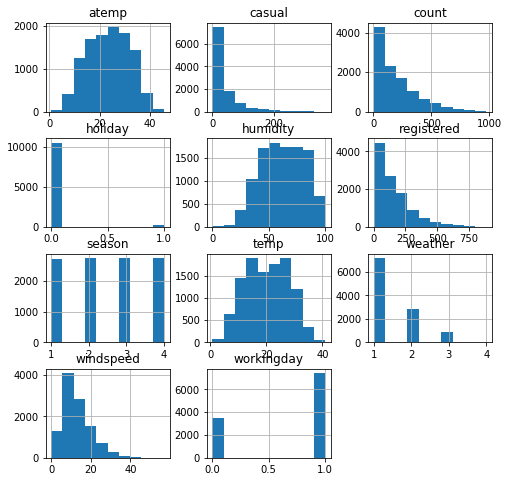

In [0]:
ax = bikes.hist(figsize=(8, 8))

**Example 1** - Throughout the day and night hours, what is the difference between the usage of registered users and casual users? Is there a change considering the working day?

In [0]:
s_hour = bikes['datetime'].dt.hour

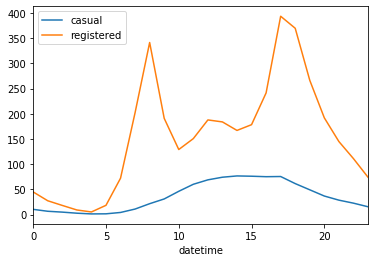

In [0]:
bikes.groupby(s_hour)['casual', 'registered'].mean().plot()

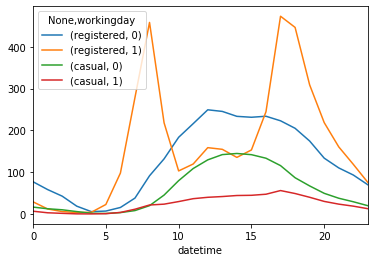

In [0]:
bikes.groupby(['workingday', s_hour])[['registered', 'casual']]\
    .mean().unstack(0).plot()

**Example 2** - What is the influence of workingday on the distribution of cyclists?

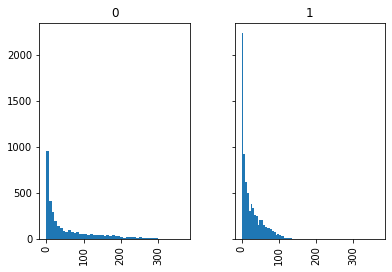

In [0]:
ax = bikes.hist(column='casual', by='workingday', bins=50, sharex=True, sharey=True)

> **Note:** Example 2 can be tried out with `weather` and `season`

**Example 3** - Given an hour of the day, what is the relation between the temperature and the number of cyclists?

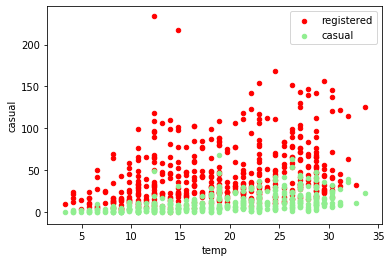

In [0]:
hour = 0
ax = bikes[bikes['datetime'].dt.hour==hour].plot.scatter(x='temp', y='registered', c='red')
bikes[bikes['datetime'].dt.hour==hour].plot.scatter(x='temp', y='casual', c='lightgreen', ax=ax)
leg = ax.legend(['registered', 'casual'])

> **Your turn:** Plot the following for the dessert dataset:
> * Plot 1 - A bar-plot indicating the number of buyers and non-buyers for each group size
> * Plot 2 - A pie chart indicating the relative part of each weekday in the data

#### Solution

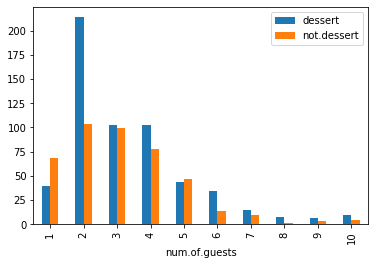

In [0]:
df_dessert.groupby('num.of.guests')[['dessert', 'not.dessert']].sum().plot.bar()

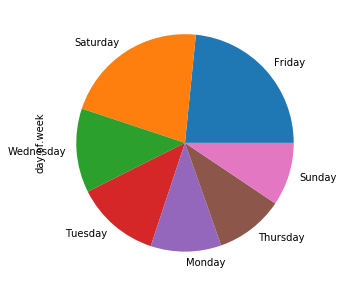

In [0]:
df_dessert['day.of.week'].value_counts().plot.pie(figsize=(5, 5))

# Example - US baby names

The file "Baby names.csv" contains information about the most frequent names in the US. For each year from 1880 to 2008 it lists the 1000 most frequent names for both boys and girls (129 x 2 x 1000 = 258000 rows). Each row includes the year, the name, the sex, the [soundex][1] of the name (which we will ignore), and most importantly - the name's frequency among its gender. We will use _pandas_ to explore this data.

[1]: https://en.wikipedia.org/wiki/Soundex "soundex - Wikipedia"

> **NOTE:** This example is fully based on a classic presentation given by _pandas_ main author Wes McKinney at 2012. The full presentation can be found on [YouTube][1]. The transcription itself is taken from [Jennifer Lee's GitHub page][2].

[1]: https://www.youtube.com/watch?v=w26x-z-BdWQ "Wes McKinney - Introdcution to pandas"
[2]: https://github.com/estimate/pandas-exercises "Jennifer Lee's GitHub page"

## Exploration

In [0]:
df_names = pd.read_csv('baby_names.csv')

In [0]:
df_names.head(5)

In [0]:
df_names.tail(3)

In [0]:
df_names[df_names.year == 1880].tail()

We separate the data into two data frames - _boys_ and _girls_. We will do the exploration with the boys, and then apply the relevant scripts to the girls as well.

In [0]:
df_boys = df_names[df_names.sex == 'boy']
df_girls = df_names[df_names.sex == 'girl']

The sum of the 'prop' column for each year does not sum to 1.

In [0]:
df_boys.head()

In [0]:
boys_grouped = df_boys.groupby('year')
boys_grouped['prop'].sum().plot()

## Part I

**Task:** We wish to visualize the changes in the popularity of the most popular name through the years.

Our approach will be to group the data by year, then to extract from each group the record of the most frequent name, and then to plot the combined result.

In [0]:
df_boys.groupby('year')['prop'].max().plot()

In [0]:
def get_max_record(group):
    return group.prop.max()

In [0]:
most_popular = df_boys.groupby('year').apply(get_max_record)
most_popular.head()
most_popular.iloc[::10, :]

And finally...

In [0]:
most_popular.prop.plot(title='Highest boys prop through years')

In [0]:
most_popular = df_girls.groupby('year').apply(get_max_record)
most_popular.prop.plot(title='Highest girls prop through years')

## Part II

**Task:** Visualize the trend of a specific name through the years.

In [0]:
name = 'Israel'
df_boys.loc[df_boys.name==name].set_index('year').plot()

We can group by the name, but since we are not interested in the data of the other names, this is a wasteful approach. We can either slice the data of the relevant name, or reindex by the name. Also, since plots use the index as their x axis, it will be simpler to make the year a secondary index.

In [0]:
name = 'Elvis'

In [0]:
df_boys2 = df_boys.set_index(['name', 'year'])
# df_boys2.head()
df_boys2.loc[name].prop.plot()

## Part III

**Task:** Visualize the "diversity" - how many names are required in order to describe half of the population - through the years.

For each year we will sum the 'prop' column (using the _cumsum()_ function) and find where this sum exceeds 0.5 (using the function [_searchsorted()_][1]).

[1]: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.searchsorted.html

### Demonstration

In [0]:
df_1880 = df_boys[df_boys.year == 1880]
df_1880.prop.head()

In [0]:
df_1880.prop.cumsum().head()

In [0]:
df_1880.prop.cumsum().searchsorted(0.5)[0]

In [0]:
df_girls.groupby('year')['prop'].apply(lambda s: s.cumsum().searchsorted(0.5)[0]).plot()

### Solution

In [0]:
def get_diversity(group):
    return group.prop.cumsum().searchsorted(0.5)[0]

In [0]:
df_boys.groupby('year').apply(get_diversity).plot()

In [0]:
boys_diversity = df_boys.groupby('year').apply(get_diversity)
girl_diversity = df_girls.groupby('year').apply(get_diversity)
boys_diversity.plot(linewidth=3)
girl_diversity.plot(linewidth=3)
plt.legend(['boys', 'girls'], loc='best')

# Exercises

## Exercise 1

Read the diamonds.csv file, follow the tasks and answer the questions below.

1.	Answer the following questions:
    * What is the highest price of a diamond with color ‘E’?
    * How many diamonds with ‘VS1’ are there in the data?
    * What is the average price of the ‘Ideal’-cut diamonds?
    * How many levels of cut, color and clarity are there in the data?
    * Calculate the average price for each combination of ‘cut’ and ‘clarity’.
2.	Create the following graphs of the entire diamonds data:
    * histograms of the ‘carat’ and ‘price’ values
    * bar-plot of the average price per ‘cut’ category
        * What is strange about the data?
    * a scatter plot of ‘price’ vs. ‘carat’
        * Do you see some patterns?
        * Do you think the dataset is biased?
    * a scatter plot of ‘y’ vs. ‘x’
        * Do you see the outliers?
    * Draw the price histogram of the diamonds with ‘Good’ cut, ‘VS2’ clarity and ‘E’ color

#### Solution

In [0]:
### TBC :-(

## Exercise 2

The [`pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None)`][1] method creates a spreadsheet-style pivot table as a DataFrame. Its arguments control the processing of the content of the pivot table. Reload the dessert dataset and create the following pivot tables using this function:

* Table 1 - The number of guests (not groups!) for each weekday and each hour
* Table 2 - The percent of groups who had purchased a dessert for each weekday and each group size.

[1]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html "pivot_table() API"

### Solution

Simple aggregations can be performed by giving simple values to _aggfunc_.

In [0]:
df = pd.read_csv("dessert.csv",
                   index_col='id')
df.head()

,day.of.week,num.of.guests,hour,table,dessert
id,,,,,
1,Monday,2,evening,13,True
2,Saturday,4,night,19,True
3,Saturday,4,after-noon,12,False
4,Thursday,3,night,5,True
5,Monday,7,noon,10,True


#### Table 1

In [0]:
pd.pivot_table(df,
               index='day.of.week',
               columns='table', 
               values='num.of.guests', 
               aggfunc='count')

#### Table 2

In [0]:
def get_percent(x):
    return float(sum(x)) / len(x) * 100

pd.pivot_table(df,
               index='day.of.week',
               columns='num.of.guests', 
               values='dessert', 
               aggfunc=get_percent,
               fill_value=0)